* Customise your plots by adding titles and legends, changing plot layout, adjusting line colour and marker style, adding horizontal or vertical lines, changing the colourmap, updating the grid or adding annotations.
* Save your plots in high resolution.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # used for loading datasets

## Customizing plots

We will study approaches to customising your plots, such as:
* Mixing multiple plot types
* Adding a title, legend and layout
* Altering line style, colour and markers
* Adding horizontal and Vertical Lines
* Altering the grid
* Annotating
* Saving a plot

## Mix multiple plot types in a Figure

We will consider the insurance dataset. It has records on the relationship between personal attributes (age, gender, BMI: body mass index, family size, smoking habits), geographic factors, and their impact on medical insurance charges.

In [6]:
df = pd.read_csv('insurance.csv').sample(50, random_state=1)
df.head(3)

,age,sex,bmi,children,smoker,region,expenses
559,19,male,35.5,0,no,northwest,1646.43
1087,57,male,31.5,0,no,northwest,11353.23
1020,51,male,37.0,0,no,southwest,8798.59


Imagine you need 3 plots in a Figure
  * A bar plot showing the distribution of the number of children.
  * A pie plot showing the proportional count of different regions in the dataset.
  * A scatter plot describing the relationship between '`age`' and  '`charges`'.

* We will create a Figure and multiple Axes using `plt.subplots()`. For each Axes, we plot the respective chart type
  * Note: the generated Figure will be missing some important visualisation elements, like a legend, title, axis label and Figure layout. We will cover that in the next section. The exercise objective is to demonstrate we can use multiple different plot types in a Figure.

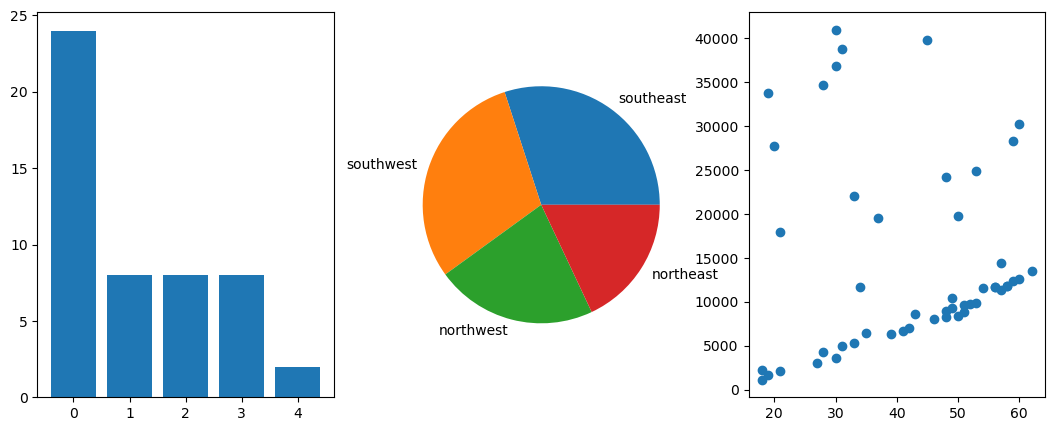

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,5))

categorical_count = df['children'].value_counts()
axes[0].bar(x=categorical_count.index, height=categorical_count)


categorical_count = df.value_counts('region',normalize=True)
axes[1].pie(x=categorical_count, labels=categorical_count.index)


axes[2].scatter(data=df, x='age', y= 'expenses')

plt.show()

Let's see how that would be done when using NumPy arrays
  * Consider three numeric arrays created from mathematic functions
    * x is generated with `np.linspace()`, which returns an evenly spaced number set over a specified interval
    * y1, is the sine of x, made with `np.sin()`
    * y2, is x times sine of x, made with `np.sin()`

In [14]:
x = np.linspace(start=0, stop=10, num=500)
y1 = np.sin(x)
y2 = x * np.sin(x)

We will create a Figure with 3 Axes and draw a line plot in the first, and a histogram for y1 and y2 in the second and third Axes, respectively.

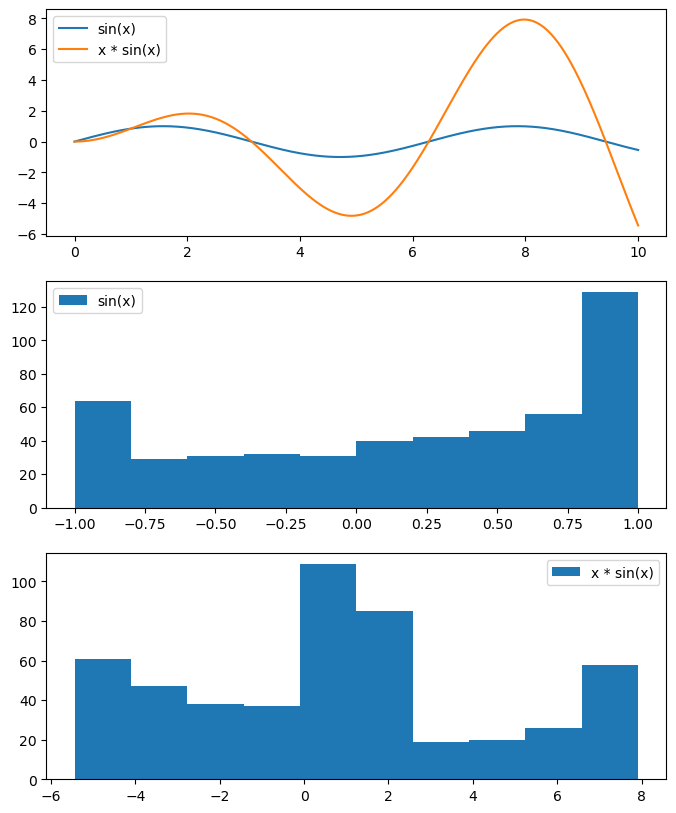

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,10))

axes[0].plot(x, y1, label='sin(x)')
axes[0].plot(x, y2, label='x * sin(x)')
axes[0].legend()

axes[1].hist(y1, label='sin(x)')
axes[1].legend()

axes[2].hist(y2, label='x * sin(x)')
axes[2].legend()

plt.show()

## Titles, Legend and Tight Layout

* Although charts are visual, you do still need to label them for your user's benefit.
* You can add a title and axes labels.
* In the example below, we consider random data generated with NumPy.
* In a Figure with 1 Axes, you will write before `plt.show()`:
  * `plt.xlabel()` to set x-axis label. The function documentation is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html)
  * `plt.ylabel()` to set y-axis label. The function documentation is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html)
  * `plt.title()` to set title. The function documentation is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html)

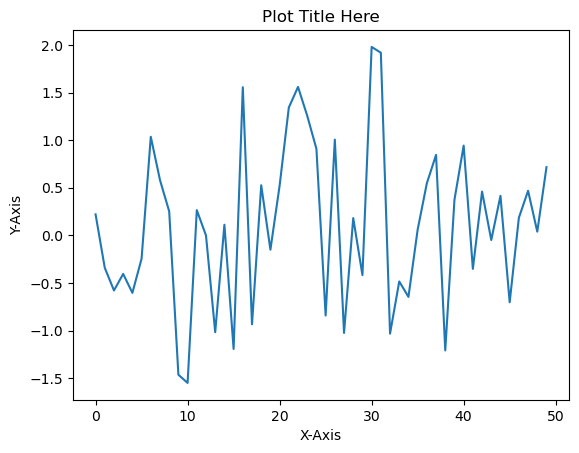

In [21]:
np.random.seed(seed=19)
x = np.random.randn(50)

plt.plot(x) 
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Plot Title Here')
plt.show()

For the next few examples, we created an auxiliary function that returns `fig` and `axes`, which in this case is **a Figure with 4 plots**. 
  * It draws mathematical functions (sine, cosine), from NumPy arrays.

In [24]:
def MultiplePlots(): 
  np.random.seed(seed=50)
  x = np.linspace(0, 10, 500)

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
  axes[0,0].plot(x, np.sin(x) )
  axes[0,1].plot(x, x * np.sin(x) )
  axes[1,0].plot(x, x * np.sin(x**2) )
  axes[1,1].plot(x, np.cos(2*x) * np.sin(x) )

  return fig, axes

Call the function to see what plots it generates.

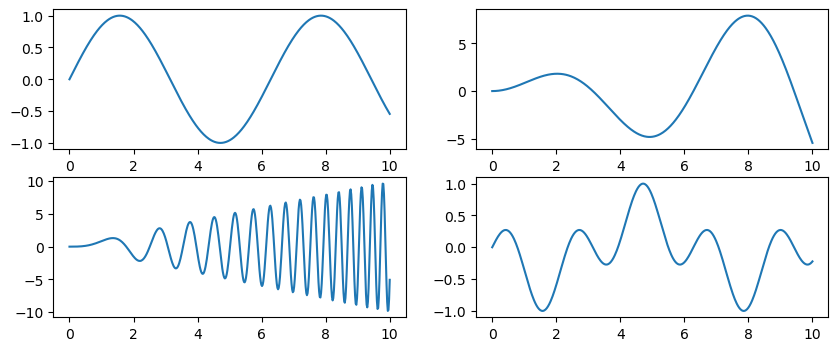

In [27]:
fig, axes = MultiplePlots()
plt.show()

Customise the Figure and Axes
* `MultiplePlots()` returns `fig` and `axes`, so you can customise them

  * To access the Axes you want, we use the bracket notation we are already familiar with.
  * `.set_title()`, sets given Axes title. The function documentation is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html)
  * `.set_xlabel()`, sets x-axis label. The function documentation is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html)
  * `.set_ylabel()`, sets y-axis label. The function documentation is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html)

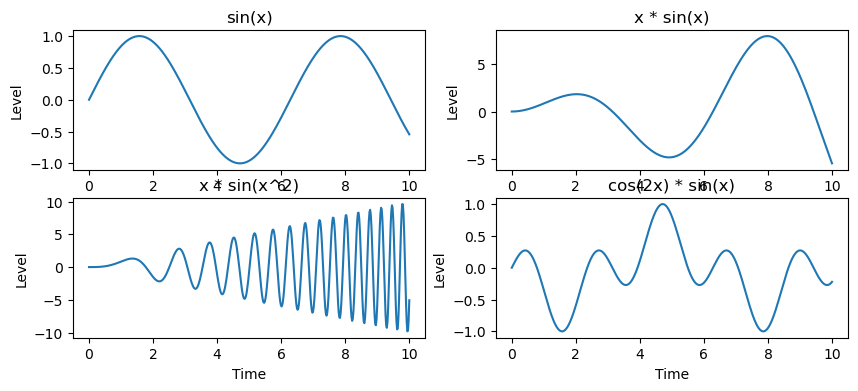

In [30]:
fig, axes = MultiplePlots()

axes[0,0].set_title('sin(x)')
axes[0,0].set_xlabel('Time')
axes[0,0].set_ylabel('Level')

axes[0,1].set_title('x * sin(x)')
axes[0,1].set_xlabel('Time')
axes[0,1].set_ylabel('Level')

axes[1,0].set_title('x * sin(x^2)')
axes[1,0].set_xlabel('Time')
axes[1,0].set_ylabel('Level')

axes[1,1].set_title('cos(2x) * sin(x)')
axes[1,1].set_xlabel('Time')
axes[1,1].set_ylabel('Level')

plt.show()

You noticed in the previous figure the **x-axis values from the upper Axes are overlapping with the titles from the lower Axes**.
* You could:
  * Increase Figure size, using figsize parameter, or
  * Add `plt.tight_layout()`, so the plots will not overlap anymore. The function documentation is found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html)

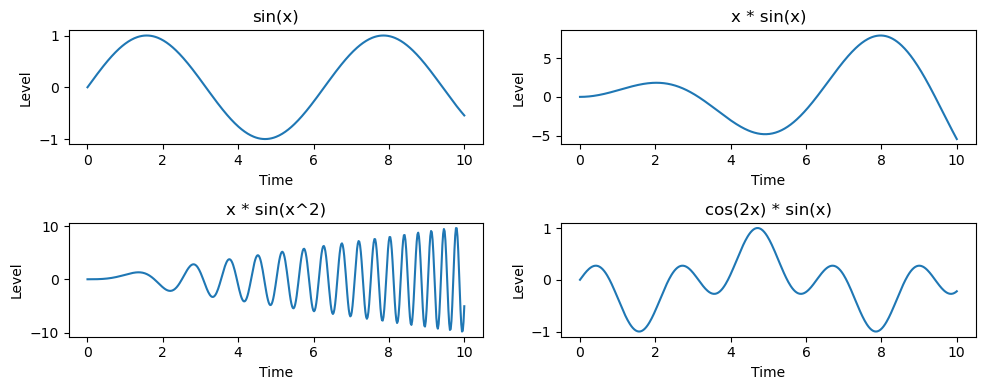

In [34]:
fig, axes = MultiplePlots()

axes[0,0].set_title('sin(x)')
axes[0,0].set_xlabel('Time')
axes[0,0].set_ylabel('Level')

axes[0,1].set_title('x * sin(x)')
axes[0,1].set_xlabel('Time')
axes[0,1].set_ylabel('Level')

axes[1,0].set_title('x * sin(x^2)')
axes[1,0].set_xlabel('Time')
axes[1,0].set_ylabel('Level')

axes[1,1].set_title('cos(2x) * sin(x)')
axes[1,1].set_xlabel('Time')
axes[1,1].set_ylabel('Level')

plt.tight_layout()   #### added plt.tight_layout()
plt.show()

When your Figure has multiple plots, you can add a title to each plot and a **title to the Figure**, applying a `.suptitle()` method to your Figure. 
  * The function documentation is found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html)

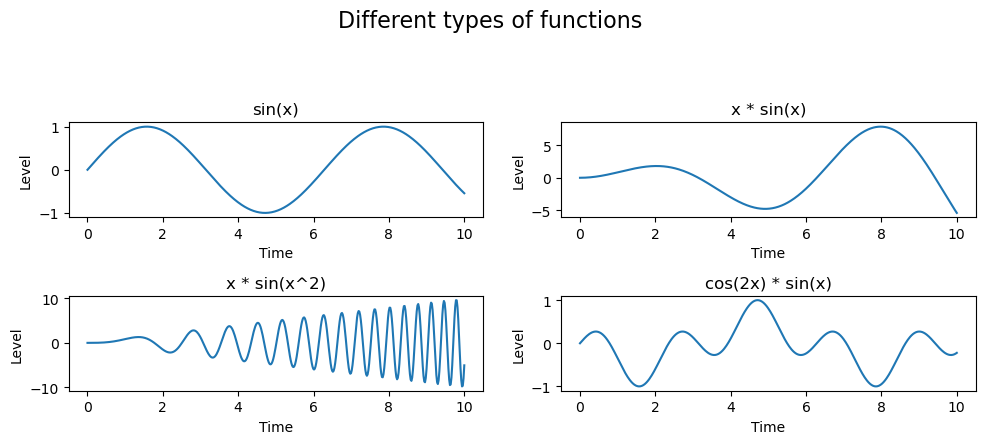

In [38]:
fig, axes = MultiplePlots()

axes[0,0].set_title('sin(x)')
axes[0,0].set_xlabel('Time')
axes[0,0].set_ylabel('Level')

axes[0,1].set_title('x * sin(x)')
axes[0,1].set_xlabel('Time')
axes[0,1].set_ylabel('Level')

axes[1,0].set_title('x * sin(x^2)')
axes[1,0].set_xlabel('Time')
axes[1,0].set_ylabel('Level')

axes[1,1].set_title('cos(2x) * sin(x)')
axes[1,1].set_xlabel('Time')
axes[1,1].set_ylabel('Level')


fig.suptitle('Different types of functions', fontsize=16, y=1.1) #### added title for the Figure
plt.tight_layout()
plt.show()

You can add and customise your legend
  * Consider 2 arrays plotted in the same Axes
  * The first is a mathematical function of sin(x), and the second is x * sin(x)
  * You will notice the argument label at `plt.plot()`, where you set how you want to call that particular plot.
  * You will notice the labels are not displaying.

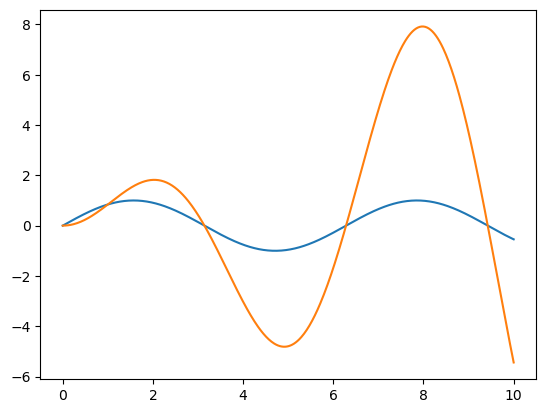

In [42]:
x = np.linspace(0, 10, 500)
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, x * np.sin(x), label='x * sin(x)')
plt.show()


What is needed in this case is a legend so the viewer knows which plot is which. We saw previously `plt.legend()`. Now we consider additional arguments
  * `loc`, set the legend at the corresponding corner of the Axes: '`upper left`', '`upper right`', '`lower left`', '`lower right`', '`center`', '`best`'
  * `title`, set legend title
  * and `frameon`, which is a `True` / `False` flag to indicate if you want the frame around the legend

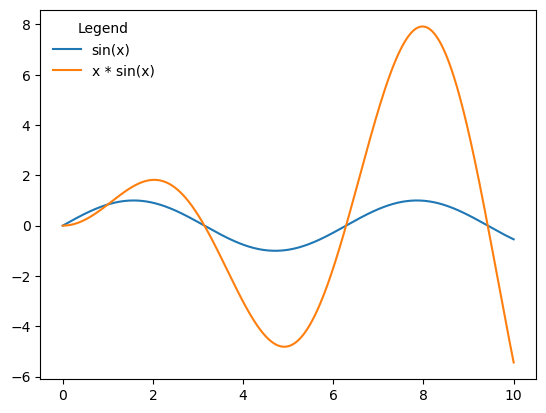

In [45]:
x = np.linspace(0, 10, 500)
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, x * np.sin(x),label='x * sin(x)')
plt.legend(loc='upper left', title='Legend', frameon=False)
plt.show()

When you are using `plt.subplots()`, either one axis or multiple Axes, you label the axes then call `.legend()`
  * The documentation is found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html)

* The example below shows a Figure with one axis

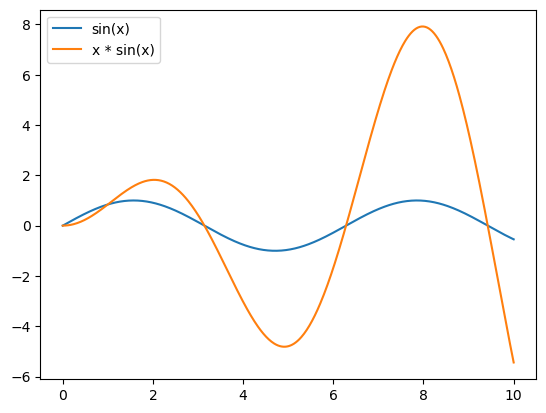

In [48]:
x = np.linspace(0, 10, 500)
fig, axes = plt.subplots()
axes.plot(x, np.sin(x), label='sin(x)')
axes.plot(x, x * np.sin(x),label='x * sin(x)')
axes.legend()
plt.show()

The example below shows a Figure with 2 Axes
  * It considers data from NumPy arrays, using `np.linspace()` and `np.sin()`

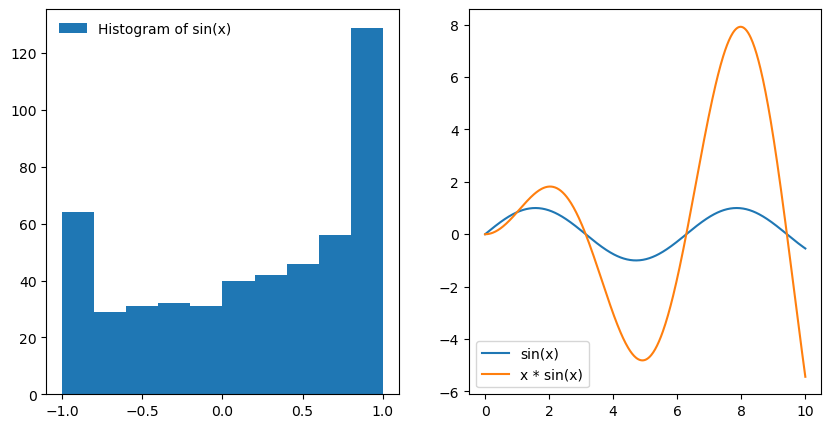

In [51]:
x = np.linspace(0, 10, 500)
y1 = np.sin(x)
y2 = x * np.sin(x)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].hist(x=y1,label='Histogram of sin(x)')
axes[0].legend(loc='best', frameon=False)

axes[1].plot(x, y1, label='sin(x)')
axes[1].plot(x, y2, label='x * sin(x)')
axes[1].legend(loc='lower left')


plt.show()

## Line Style, Colour and Marker

In the plotting functions we studied, there are arguments to set **line style and colour**

  * Once you find the argument notation for setting the colour, in `plt.plot()` is `color`, you can set the colours, considering the basic options, like **['b', 'g', 'r', 'c', 'm', 'y', 'k']**, or write the [hexadecimal](https://htmlcolorcodes.com/) value of your desired colour. Don't forget to add `#` before the color hex code when parsing to Matplotlib
  * Once you find the argument notation for setting the style, in plt.plot() is `linestyle`. This [link](https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html) shows options for it: **[ '-' , '--' , '-.' , ':' ]**
  * In addition, you can set line width with linewidth parameter.

* The rule of thumb for customising is to double-check the plotting function so you are aware of the proper argument notation.

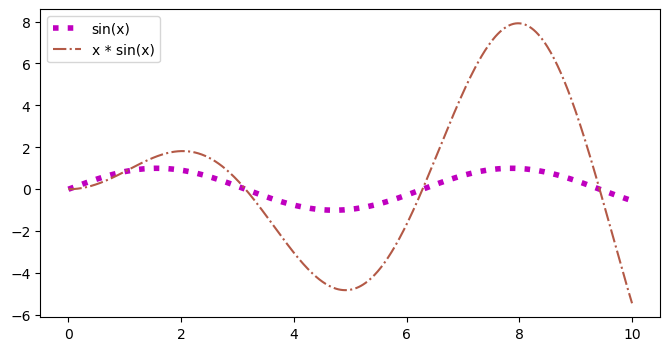

In [54]:
x = np.linspace(0, 10, 500)
fig, axes = plt.subplots(figsize=(8,4))
axes.plot(x, np.sin(x), color='m', linewidth=4 , linestyle=':', label='sin(x)')
axes.plot(x, x * np.sin(x),color='#B35946', linestyle='-.', label='x * sin(x)')
axes.legend()
plt.show()


You can set the **marker** notation
  * The marker options are found [here](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)
  * The rule of thumb for customising it is to double-check the plotting function so you can be aware of the proper argument notation. In this case, `.scatter()` has `marker` as the notation to set a marker.

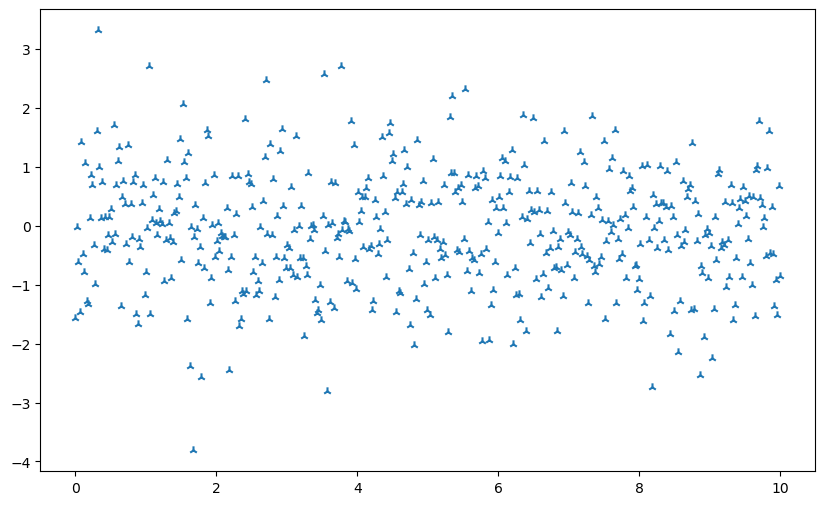

In [59]:
x = np.linspace(0, 10, 500)
fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x=x,y= np.random.randn(500),marker='2')
plt.show()

## Add horizontal and vertical lines

You can add horizontal and vertical lines in your Figure to highlight something you are interested in.
  * If your Figure has a single plot, use
    * `plt.axhline()` to add horizontal line. The function documentation is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html)
    * `plt.axvline()` to add vertical line. The function documentation is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)

  * Naturally, you can customise the line with the techniques we learned so far, like colour or line style

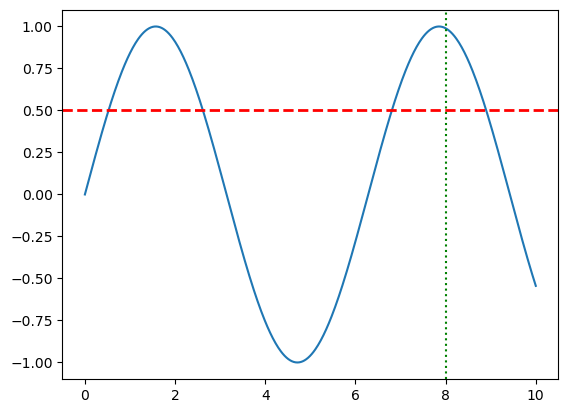

In [62]:
x = np.linspace(0, 10, 500)
plt.plot(x, np.sin(x))
plt.axhline(y=0.5, color='r', linestyle='dashed',linewidth=2)
plt.axvline(x=8, color='g', linestyle=':')

plt.show()

If your Figure has multiple Axes, you will select a given Axes and use:
  * `.axvline()` to add a vertical line. The function documentation is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html)
  * `.axhline()` to add a horizontal line. The function documentation is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html)

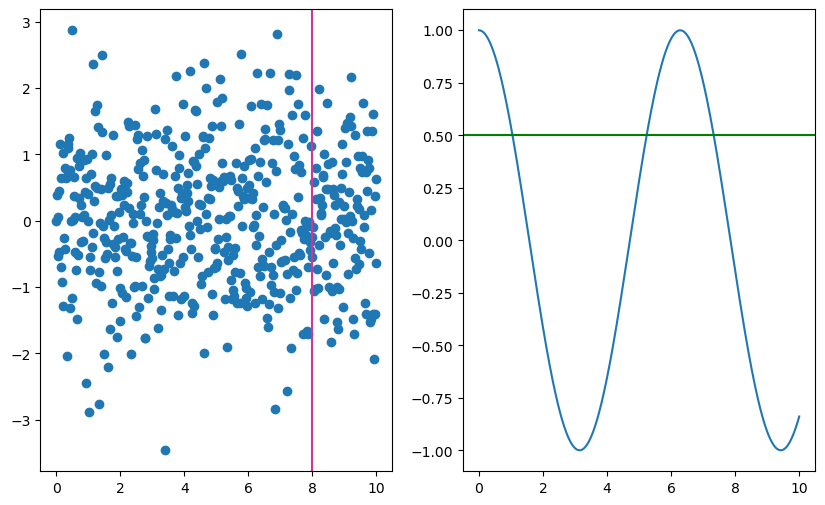

In [65]:
x = np.linspace(0, 10, 500)
y1 = np.random.randn(500)
y2 = np.cos(x)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
axes[0].scatter(x=x, y=y1)
axes[0].axvline(x=8,color='#D1349C', linestyle='-')

axes[1].plot(x,y2)
axes[1].axhline(y=0.5, color='g')

plt.show()

## Colormap

In [69]:
df = pd.read_csv('insurance.csv')
df = df.head(50)
print(df.shape)
df.head(3)

(50, 7)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46


If you plot in Matplotlib, for example, a scatter plot and add the parameter c to colour the dots based on a variable level, the plot will not show a gradient bar level so that you can relate the colour to the levels.

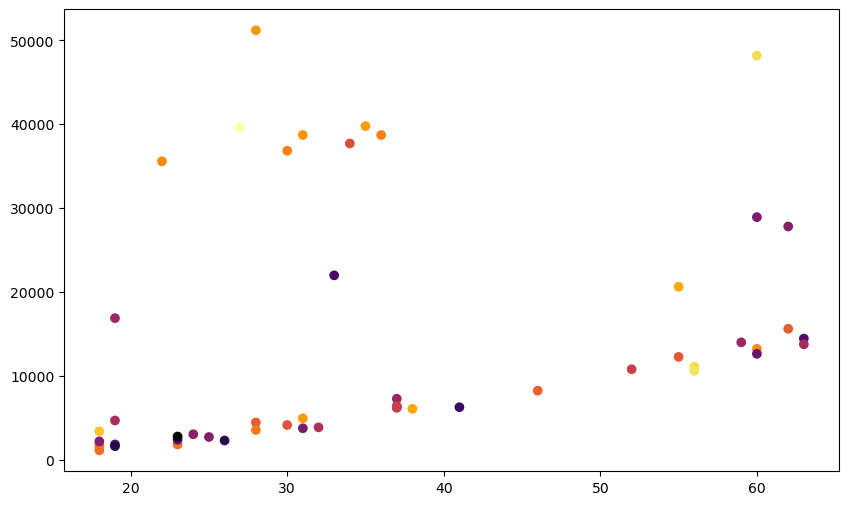

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(data=df, x='age',y='expenses',c='bmi',cmap='inferno')
plt.show()

You should add plt.colorbar() to display a bar for the colour variable. The gallery for matplotlib colormap reference is found [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py)

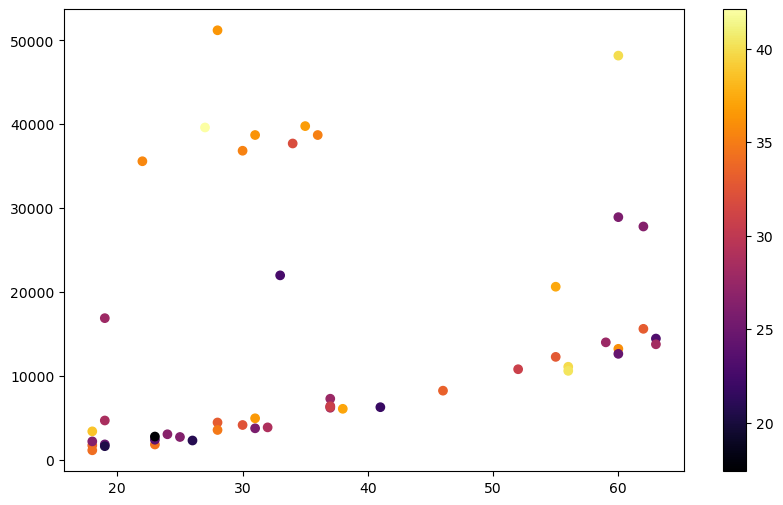

In [79]:
plt.figure(figsize=(10,6))
plt.scatter(data=df, x='age',y='expenses',c='bmi',cmap='inferno')
plt.colorbar()
plt.show()

## Grid

You can change grid properties, in a figure level, with plt.grid(). The documentation function is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)
* In this case, we just changed the line style. More options are available in the documentation.

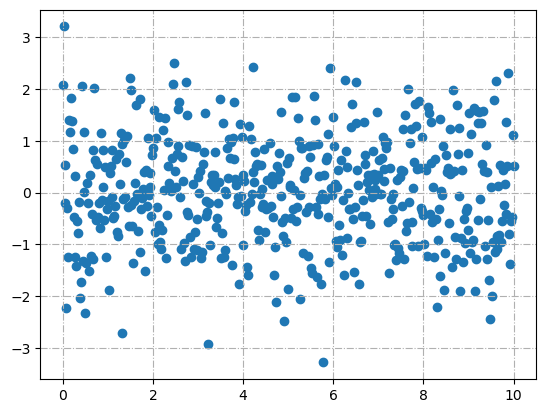

In [82]:
x = np.linspace(0, 10, 500)
y = np.random.randn(500)
plt.scatter(x,y)
plt.grid(True, linestyle='-.') 
plt.show()

You can change grid properties, at an axes level, with .grid(). The documentation function is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html)
* In this case, we set a line style for the grid and applied it only to the y-axis.

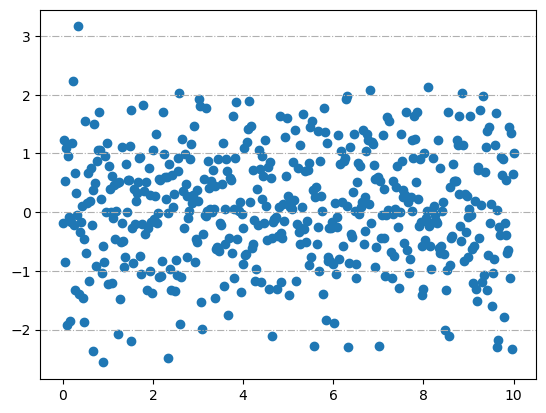

In [89]:
x = np.linspace(0, 10, 500)
y = np.random.randn(500)

fig, axes = plt.subplots()
axes.scatter(x=x,y=y)
axes.grid(True, linestyle='-.', axis='y')
plt.show()

## Annotation

You can annotate your plot to convey specific information with plt.text() The documentation function, which is used at a figure level, is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)

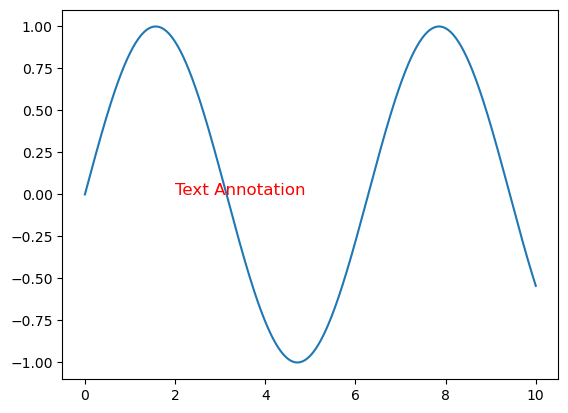

In [92]:
x = np.linspace(0, 10, 500)
plt.plot(x, np.sin(x))

plt.text(x=2, y=0, s='Text Annotation', fontsize=12, c='r')
plt.show()

* The documentation function to be used in an axes level can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html)

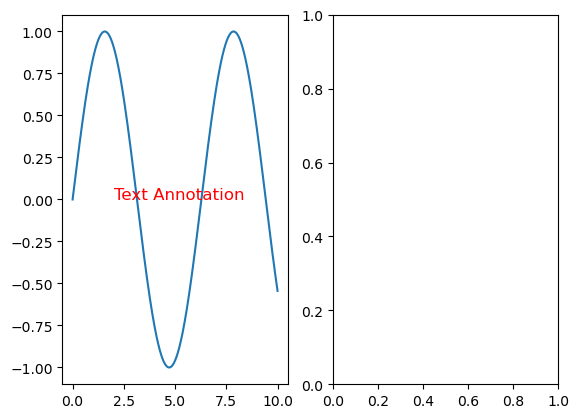

In [95]:
x = np.linspace(0, 10, 500)
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(x, np.sin(x))
axes[0].text(x=2, y=0, s='Text Annotation', fontsize=12, c='r')
plt.show()

## Save your plot

You can save your plot with plt.savefig(). The documentation is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)
* The arguments are the file path and the image name, where the image should be stored. `bbox_inches='tight'`, so the figure has nice and even space among its elements, and `dpi=150` to generate an image with high quality.
* You will draw your plot, then you will run the plt.savefig() command. 
* In this case, the image name is "created_image.png", and is saved in the root directory of your application.
* When saving an image, you should not add plt.show(), since your objective is not to display the image.
* When using a jupyter notebook and saving an image with plt.savefig(), the image will appear as an output anyway, but not due to plt.show(), but rather because of plt.savefig() functionality.

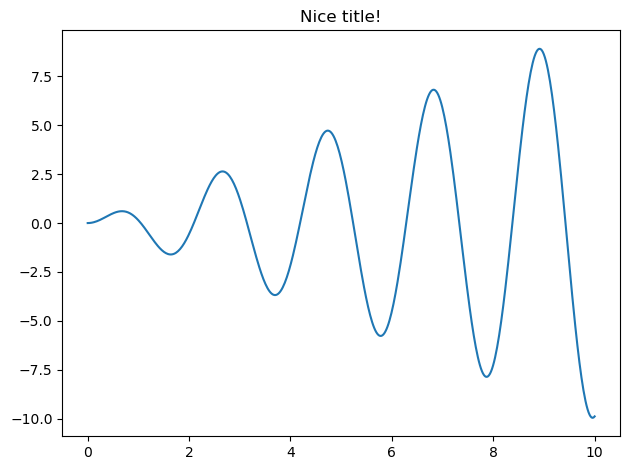

In [99]:
x = np.linspace(0, 10,500)
plt.plot(x, np.sin(3*x) * x)
plt.title("Nice title!")
plt.tight_layout()
plt.savefig('created_image.png', bbox_inches='tight', dpi=150)

Check the root folder of your application to check your new image!

In [102]:
!ls

01. Series & DataFrame.ipynb
02. Filter Add and Drop DataFrame Columns, Column Rearrange.ipynb
03. Select Data(loc, iloc, query).ipynb
04. Index and MultiIndex.ipynb
05. Data input and output.ipynb
06. Missing data(Isnull, Isna, Dropna, Notna,  Fillna).ipynb
07. Initial Data Exploration(info, head, tail, shape, dtype, columns, unique, nunique, describe, value_counts, corr).ipynb
08. Data Manipulation Part 1(Rename, Convert, Select_dtypes, to_numpy).ipynb
09. Data Manipulation Part 2(Replace, Change-astype, Manage-duplicated).ipynb
10a. Time Series data(Resample, Rolling, Shift, Diff, Pct).ipynb
10b. Python_Time (John).ipynb
11. Apply function.ipynb
12. Lambda function.ipynb
13. Pipe.ipynb
14. Sorting data and Chaining Methods.ipynb
15. Long x Wide format, Pivot Table, Melt.ipynb
16. Group By.ipynb
17. Concatenate, Append, Merge and Join.ipynb
18. Data Visualisation - Line Plot.ipynb
19. Data Visualization - Histogram.ipynb
20. Data Visualisation - Box Plot.ipynb
21. Data Visualisation 